In [25]:
from IPython.display import Markdown, HTML
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import time
from sklearn import metrics
import math

In [2]:
from fairmlhealth import model_comparison as fhmc, reports
from fairmlhealth.mimic_data import load_mimic3_example

from fairmlhealth.utils import validate_notebook_requirements
validate_notebook_requirements()

In [3]:
path = "/Users/admin/Downloads/diabetic_data.csv"

In [4]:
dataset = pd.read_csv("diabetic_data.csv")

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [6]:
#Deleting columns from dataset
dataset = dataset.drop(["encounter_id", "patient_nbr"], axis=1)

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 48 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   race                      101766 non-null  object
 1   gender                    101766 non-null  object
 2   age                       101766 non-null  object
 3   weight                    101766 non-null  object
 4   admission_type_id         101766 non-null  int64 
 5   discharge_disposition_id  101766 non-null  int64 
 6   admission_source_id       101766 non-null  int64 
 7   time_in_hospital          101766 non-null  int64 
 8   payer_code                101766 non-null  object
 9   medical_specialty         101766 non-null  object
 10  num_lab_procedures        101766 non-null  int64 
 11  num_procedures            101766 non-null  int64 
 12  num_medications           101766 non-null  int64 
 13  number_outpatient         101766 non-null  int64 
 14  numb

In [8]:
dataset.head()

,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,...,No,No,No,No,No,No,No,No,No,NO
1,Caucasian,Female,[10-20),?,1,1,7,3,?,?,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,...,No,No,No,No,No,No,No,No,Yes,NO
3,Caucasian,Male,[30-40),?,1,1,7,2,?,?,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,Caucasian,Male,[40-50),?,1,1,7,1,?,?,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [9]:
dataset.describe()

,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [10]:
type(dataset)

pandas.core.frame.DataFrame

In [11]:
dataset = pd.get_dummies(dataset, prefix=['race', 'gender','medical_specialty','payer_code','weight','admission_type_id',
                                          'discharge_disposition_id','admission_source_id','diabetesMed',
                                          'change'
                                         ], 
                         columns=['race', 'gender','medical_specialty','payer_code','weight','admission_type_id',
                                  'discharge_disposition_id','admission_source_id','diabetesMed',
                                  'change'
                                 ])
dataset.replace(to_replace=['None'], value=0, inplace=True)

dataset = dataset.drop(['diag_1','diag_2','diag_3'],axis=1)
dataset = dataset.drop(['max_glu_serum','A1Cresult','metformin','repaglinide','nateglinide','chlorpropamide',
                        'glimepiride','acetohexamide','glipizide','glyburide','tolbutamide','pioglitazone',
                        'rosiglitazone','acarbose','miglitol','troglitazone','tolazamide','examide','citoglipton','insulin',
                        'glyburide-metformin','glipizide-metformin','glimepiride-pioglitazone','metformin-rosiglitazone',
                        'metformin-pioglitazone'],axis=1)

In [12]:
type(dataset)

pandas.core.frame.DataFrame

In [13]:
dataset['readmitted'].unique()

array(['NO', '>30', '<30'], dtype=object)

In [14]:
dataset.groupby('readmitted').count()

,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,race_?,...,admission_source_id_13,admission_source_id_14,admission_source_id_17,admission_source_id_20,admission_source_id_22,admission_source_id_25,diabetesMed_No,diabetesMed_Yes,change_Ch,change_No
readmitted,,,,,,,,,,,,,,,,,,,,,
<30,11357,11357,11357,11357,11357,11357,11357,11357,11357,11357,...,11357,11357,11357,11357,11357,11357,11357,11357,11357,11357
>30,35545,35545,35545,35545,35545,35545,35545,35545,35545,35545,...,35545,35545,35545,35545,35545,35545,35545,35545,35545,35545
NO,54864,54864,54864,54864,54864,54864,54864,54864,54864,54864,...,54864,54864,54864,54864,54864,54864,54864,54864,54864,54864


In [15]:
dataset['readmitted'] = dataset['readmitted'].replace(['NO'],0)
dataset['readmitted'] = dataset['readmitted'].replace(['>30'],1)
dataset['readmitted'] = dataset['readmitted'].replace(['<30'],1)

In [16]:
#converting age into binary values
dataset.loc[dataset['age'] <= "[50-60)", 'age_coded'] = 0
dataset.loc[dataset['age'] > "[50-60)", 'age_coded'] = 1
dataset = dataset.drop(['age'], axis=1)

In [17]:
dataset

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,readmitted,race_?,...,admission_source_id_14,admission_source_id_17,admission_source_id_20,admission_source_id_22,admission_source_id_25,diabetesMed_No,diabetesMed_Yes,change_Ch,change_No,age_coded
0,1,41,0,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0.0
1,3,59,0,18,0,0,0,9,1,0,...,0,0,0,0,0,0,1,1,0,0.0
2,2,11,5,13,2,0,1,6,0,0,...,0,0,0,0,0,0,1,0,1,0.0
3,2,44,1,16,0,0,0,7,0,0,...,0,0,0,0,0,0,1,1,0,0.0
4,1,51,0,8,0,0,0,5,0,0,...,0,0,0,0,0,0,1,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,3,51,0,16,0,0,0,9,1,0,...,0,0,0,0,0,0,1,1,0,1.0
101762,5,33,3,18,0,0,1,9,0,0,...,0,0,0,0,0,0,1,0,1,1.0
101763,1,53,0,9,1,0,0,13,0,0,...,0,0,0,0,0,0,1,1,0,1.0
101764,10,45,2,21,0,0,1,9,0,0,...,0,0,0,0,0,0,1,1,0,1.0


In [18]:
#Split Data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#sc_X = StandardScaler()

y = dataset.readmitted

X = dataset.drop(["readmitted"], axis=1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=1/3,random_state=42, stratify=y)

In [19]:
dataset['readmitted'] == 1

0         False
1          True
2         False
3         False
4         False
          ...  
101761     True
101762    False
101763    False
101764    False
101765    False
Name: readmitted, Length: 101766, dtype: bool

In [20]:
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

In [21]:
num_obs = len(dataset)
num_true = len(dataset.loc[dataset['readmitted'] == 1])
num_false = len(dataset.loc[dataset['readmitted'] == 0])
print("Number of True cases:  {0} ({1:2.2f}%)".format(num_true, (num_true/num_obs) * 100))
print("Number of False cases: {0} ({1:2.2f}%)".format(num_false, (num_false/num_obs) * 100))

Number of True cases:  46902 (46.09%)
Number of False cases: 54864 (53.91%)


In [22]:
#Test Baseline
# Set model parameters (currently set as default values, but defined here to be explicit)
rf_params = {'n_estimators': 50, 'min_samples_split': 5, 'bootstrap': False}

# Train Model
rf_model = RandomForestClassifier(**rf_params)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# display performance 
print("\n", "Random Forest Prediction Scores:", "\n", 
      classification_report(y_test, y_pred_rf, target_names=['Male', 'Female']))


 Random Forest Prediction Scores: 
               precision    recall  f1-score   support

        Male       0.65      0.69      0.67     18288
      Female       0.61      0.55      0.58     15634

    accuracy                           0.63     33922
   macro avg       0.63      0.62      0.62     33922
weighted avg       0.63      0.63      0.63     33922



In [23]:
#Test Baseline
# Set model parameters (currently set as default values, but defined here to be explicit)
rf_params = {'n_estimators': 50, 'min_samples_split': 5, 'bootstrap': False}

# Train Model
rf_model = RandomForestClassifier(**rf_params)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# display performance 
print("\n", "Random Forest Prediction Scores:", "\n", 
      classification_report(y_test, y_pred_rf, target_names=['Caucasian', 'AfricanAmerican']))


 Random Forest Prediction Scores: 
                  precision    recall  f1-score   support

      Caucasian       0.65      0.70      0.67     18288
AfricanAmerican       0.61      0.55      0.58     15634

       accuracy                           0.63     33922
      macro avg       0.63      0.63      0.63     33922
   weighted avg       0.63      0.63      0.63     33922



In [39]:
#XGBoost algorithm
from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators=100)
training_start = time.perf_counter()
xgb.fit(X_train, y_train)
training_end = time.perf_counter()
prediction_start = time.perf_counter()
preds = xgb.predict(X_test)
prediction_end = time.perf_counter()
acc_xgb = (preds == y_test).sum().astype(float) / len(preds)*100
xgb_train_time = training_end-training_start
xgb_prediction_time = prediction_end-prediction_start
print("XGBoost's prediction accuracy is: %3.2f" % (acc_xgb))
print("Time consumed for training: %4.3f" % (xgb_train_time))
print("Time consumed for prediction: %6.5f seconds" % (xgb_prediction_time))

ValueError: feature_names may not contain [, ] or <

In [33]:
#Decision Tree algorithm
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
dataset = DecisionTreeClassifier(random_state=101)
dataset.fit(X_train, y_train)
predictions = dataset.predict(X_test)

In [34]:
predictions

array([0, 0, 0, ..., 1, 0, 0])

In [35]:
np.unique(predictions)

array([0, 1])

In [37]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test, predictions))
print()
print(classification_report(y_test, predictions))
print()
print('F1 score: ', f1_score(y_test, predictions))

[[10909  7379]
 [ 7266  8368]]

              precision    recall  f1-score   support

           0       0.60      0.60      0.60     18288
           1       0.53      0.54      0.53     15634

    accuracy                           0.57     33922
   macro avg       0.57      0.57      0.57     33922
weighted avg       0.57      0.57      0.57     33922


F1 score:  0.533316337911475


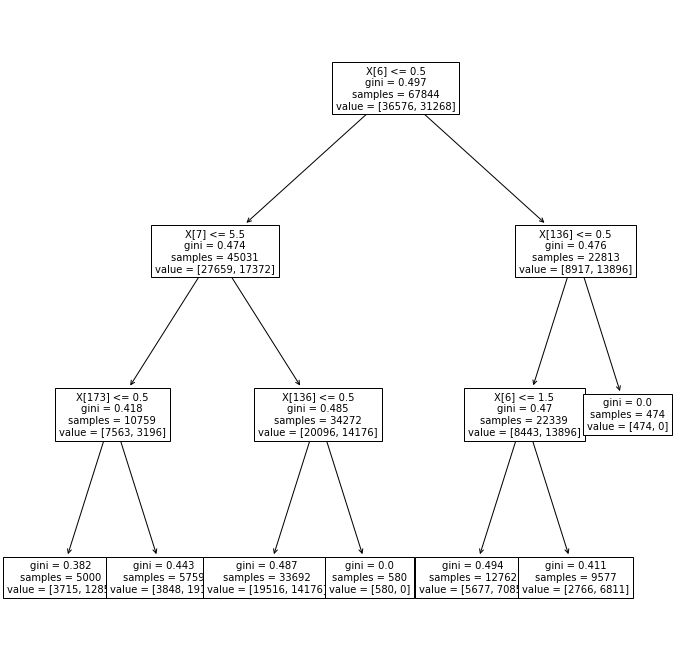

In [38]:
import matplotlib.pyplot as plt
from sklearn import tree
dataset = tree.DecisionTreeClassifier(max_depth=3)
dataset.fit(X_train, y_train)
plt.figure(figsize=(12,12))
tree.plot_tree(dataset, fontsize=10)
plt.show()

In [25]:
# Generate comparison table (returned as a pandas dataframe)
meas = fhmc.measure_model(X_test, y_test, X_test['age_coded'], rf_model)
reports.flag(meas)

In [26]:
# Mitigation Algorithms
from fairlearn.reductions import GridSearch, ExponentiatedGradient

# Fairness Measures
from fairlearn.reductions import EqualizedOdds, DemographicParity

In [27]:
# Set seed for consistent results with Fairlearn's ExponentiatedGradient
np.random.seed(36) 

In [28]:
X_train

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,race_?,race_AfricanAmerican,...,admission_source_id_14,admission_source_id_17,admission_source_id_20,admission_source_id_22,admission_source_id_25,diabetesMed_No,diabetesMed_Yes,change_Ch,change_No,age_coded
88571,1,42,0,7,1,0,0,9,0,1,...,0,0,0,0,0,0,1,0,1,0.0
61187,6,53,0,19,0,0,0,5,0,0,...,0,0,0,0,0,0,1,1,0,1.0
71796,2,2,0,10,0,0,0,6,0,0,...,0,0,0,0,0,0,1,0,1,1.0
60949,4,51,0,17,0,0,0,9,0,0,...,0,0,0,0,0,1,0,0,1,1.0
90159,5,26,1,19,0,0,0,9,0,0,...,0,0,0,0,0,0,1,1,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14214,4,57,0,18,0,0,0,9,0,1,...,0,0,0,0,0,1,0,0,1,1.0
8697,2,31,0,8,0,0,1,9,0,0,...,0,0,0,0,0,0,1,0,1,1.0
96924,4,63,0,27,0,0,0,9,0,0,...,0,0,0,0,0,0,1,1,0,1.0
88388,3,68,1,18,0,0,0,9,0,0,...,0,1,0,0,0,0,1,1,0,0.0


In [29]:
reports.data_report(X_test['age_coded'], y_test)

,Feature Name,Feature Value,Obs.,Missing Values,Feature Entropy,Target Max,Target Mean,Target Median,Target Min,Target Std. Dev.,Value Prevalence
0,ALL FEATURES,ALL VALUES,33922.0,0,NaN,1.0,0.4609,0.0,0.0,0.4985,1.0000
1,age_coded,0.0,11031.0,0,0.9099,1.0,0.4335,0.0,0.0,0.4956,0.3252
2,age_coded,1.0,22891.0,0,0.9099,1.0,0.4741,0.0,0.0,0.4993,0.6748


In [30]:
reports.performance_report(X_test['age_coded'], y_test, y_pred_rf)

,Feature Name,Feature Value,Obs.,Target Mean,Pred. Mean,Accuracy,FPR,Precision,TPR
0,ALL FEATURES,ALL VALUES,33922.0,0.4609,0.4182,0.6312,0.3025,0.6101,0.5536
1,age_coded,0.0,11031.0,0.4335,0.3681,0.6667,0.2365,0.6361,0.5402
2,age_coded,1.0,22891.0,0.4741,0.4424,0.6141,0.3367,0.5996,0.5595


In [31]:
reports.bias_report(X_test['age_coded'], y_test, y_pred_rf)

,Feature Name,Feature Value,Obs.,FPR Diff,FPR Ratio,PPV Diff,PPV Ratio,TPR Diff,TPR Ratio
0,age_coded,0.0,11031.0,0.1002,1.4237,-0.0364,0.9428,0.0194,1.0359
1,age_coded,1.0,22891.0,-0.1002,0.7024,0.0364,1.0607,-0.0194,0.9654


In [32]:
#Fair ExponentiatedGradient Using Demographic Parity as Constraint
eg_rfDP_model = ExponentiatedGradient(RandomForestClassifier(**rf_params), 
                                      constraints=DemographicParity()) 
eg_rfDP_model.fit(X_train, y_train,
                  sensitive_features=X_train['age_coded'])
y_pred_eg_rfDP = eg_rfDP_model.predict(X_test)

# display performance 
print("\n", "Prediction Scores:", "\n", 
      classification_report(y_test, y_pred_eg_rfDP, 
       target_names=['age <= 60', 'age > 60']))


 Prediction Scores: 
               precision    recall  f1-score   support

   age <= 60       0.64      0.70      0.67     18288
    age > 60       0.61      0.55      0.58     15634

    accuracy                           0.63     33922
   macro avg       0.63      0.62      0.62     33922
weighted avg       0.63      0.63      0.63     33922



In [33]:
#Fair ExponentiatedGradient Using Equalized Odds as Constraint
eg_rfEO_model = ExponentiatedGradient(RandomForestClassifier(**rf_params), 
                                      constraints=EqualizedOdds())  
eg_rfEO_model.fit(X_train, y_train, 
                  sensitive_features=X_train['age_coded'])
y_pred_eg_rfEO = eg_rfEO_model.predict(X_test)

# display performance 
print("\n", "Prediction Scores:", "\n", 
      classification_report(y_test, y_pred_eg_rfEO, 
       target_names=['age <= 60', 'age > 60']))


 Prediction Scores: 
               precision    recall  f1-score   support

   age <= 60       0.65      0.69      0.67     18288
    age > 60       0.61      0.56      0.58     15634

    accuracy                           0.63     33922
   macro avg       0.63      0.63      0.63     33922
weighted avg       0.63      0.63      0.63     33922



In [34]:
#Fair GridSearch Using Demographic Parity as Constraint
# Train GridSearch
gs_rfDP_model = GridSearch(RandomForestClassifier(**rf_params),
                           constraints=DemographicParity(),
                           grid_size=45)

gs_rfDP_model.fit(X_train, y_train, 
                  sensitive_features=X_train['age_coded'])
y_pred_gs_rfDP = gs_rfDP_model.predict(X_test)

# display performance 
print("\n", "Prediction Scores:", "\n", 
      classification_report(y_test, y_pred_gs_rfDP, 
       target_names=['age <= 60', 'age > 60']))


 Prediction Scores: 
               precision    recall  f1-score   support

   age <= 60       0.63      0.69      0.66     18288
    age > 60       0.60      0.53      0.56     15634

    accuracy                           0.62     33922
   macro avg       0.62      0.61      0.61     33922
weighted avg       0.62      0.62      0.62     33922



In [36]:
#Fair GridSearch Using Equalized Odds as Constraint
# Train GridSearch
gs_rfEO_model = GridSearch(RandomForestClassifier(**rf_params),
                           constraints=EqualizedOdds(),
                           grid_size=45)

gs_rfEO_model.fit(X_train, y_train, 
                  sensitive_features = X_train['age_coded'])
y_pred_gs_rfEO = gs_rfEO_model.predict(X_test)

# display performance 
print("\n", "Prediction Scores:", "\n", 
      classification_report(y_test, y_pred_gs_rfEO, 
       target_names=['age <= 60', 'age > 60']))


 Prediction Scores: 
               precision    recall  f1-score   support

   age <= 60       0.64      0.70      0.67     18288
    age > 60       0.61      0.55      0.58     15634

    accuracy                           0.63     33922
   macro avg       0.63      0.62      0.62     33922
weighted avg       0.63      0.63      0.63     33922



In [ ]:
#Comparing Several Models
#Setting the Required Variables
X = X_test
y = y_test
protected_attr = X_test['age_coded']
models = {'rf_model': rf_model,
         'gs_rfEO_model': gs_rfEO_model, 'gs_rfDP_model': gs_rfDP_model,
         'eg_rfEO_model': eg_rfEO_model, 'eg_rfDP_model': eg_rfDP_model}
display("Models being compared in this example:", list(models.keys()))

In [ ]:
#Comparison with the FairMLHealth Tool
# Generate comparison table (returned as a pandas dataframe)
comparison = fhmc.compare_models(X, y, protected_attr, models)

# Here we determine the indices for equal odds measures so that we can highlight according
#    to those indices later
idx = pd.IndexSlice
eotag = idx[:, ['Equal Opportunity Difference', 'Equalized Odds Difference',
                 'Equalized Odds Ratio']
            ]
equal_odds = comparison.loc[eotag, :].index

# Here we return the flagged table as a pandas styler so we can also highlight 
#       measures of Equal Odds
flagged = reports.flag(comparison, as_styler=True)
flagged.apply(lambda x: ['background-color:' + "#DED8F9" 
                          if x.name in equal_odds else '' for i in x]
                , axis=1)